# Гистограммы, разбиения по интервалам и плотность

Простая гистограмма может принести огромную пользу при первичном анализе набора данных. Ранее мы видели пример использования функции библиотеки Matplotlib для создания простой гистограммы в одну строку после выполнения всех обычных импортов.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
data = np.random.randn(1000)

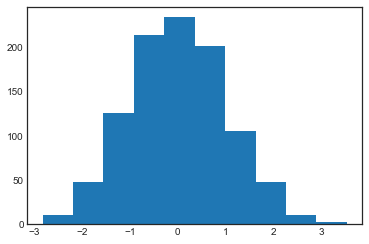

In [4]:
plt.hist(data);

У функции hist() имеется множество параметров для настройки как вычисления, так и отображения. Вот пример гистограммы с детальными пользовательскими настройками:

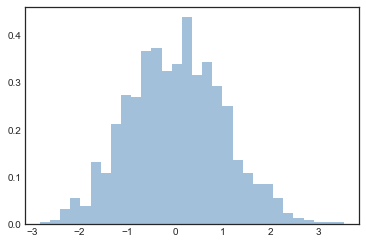

In [16]:
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none');

Docstring функции plt.hist содержит более подробную информацию о других доступных возможностях пользовательской настройки. Сочетание опции histtype='stepfilled' с заданной прозрачностью alpha представляется мне очень удобным для сравнения гистограмм нескольких распределений:

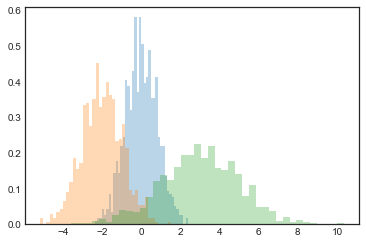

In [20]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Если же вам нужно вычислить гистограмму (то есть подсчитать количество точек в заданном интервале) и не отображать ее, к вашим услугам функция np.histogram():

In [21]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 58 340 436 153  13]


## Двумерные гистограммы и разбиения по интервалам